                              158.739-2020 Semester 1 - Salu Sasikumar (Student ID: 20011049)

## <span style='color:darkblue'> <span style='font-family:serif:'><h1><center>**Assignment-3**</span>
                                                               

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### INTRODUCTION

**The objective of this notebook is to design a database (DB) schema that represents all the data that  have acquired for project from multiple sources in a normalised form, and to populate it using SQLite, thus achieving full data persistence.**

 

###  PYTHON PACKAGES

In [2]:
## Importing required Python Packages and Libraries
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
!pip install ipython-sql
%load_ext sql

###  DATA ACQUISITION USING API

Obtaining this date through API:"https://who-covid-19-data.p.rapidapi.com/api/data" from www.rapidapi.com. This API is been updated on a daily basis and since the object for each country is appending on a regualr intervel.

In [3]:

## Reading Data 
url = "https://who-covid-19-data.p.rapidapi.com/api/data"
headers = {
    'x-rapidapi-host': "who-covid-19-data.p.rapidapi.com",
    'x-rapidapi-key': "c32191641bmsh98e146a09c181d9p135b6cjsn0ec5b5e5ee6b"
    }
response = requests.request("GET", url, headers=headers, params={})
resp = response.json()
Cov_19= pd.DataFrame(response.json()) #change to dataframe


##Printing the information about the  DataFrame(name of tthe column,dtype and  dtypes)
Cov_19.info()
Cov_19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20937 entries, 0 to 20936
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               20937 non-null  object 
 1   cases              20937 non-null  int64  
 2   newCases           20935 non-null  float64
 3   deaths             20937 non-null  int64  
 4   newDeaths          20937 non-null  int64  
 5   transmissionType   20659 non-null  float64
 6   daysSinceLastCase  20936 non-null  float64
 7   region             20937 non-null  object 
 8   territory          20937 non-null  bool   
 9   reportDate         20937 non-null  object 
 10  reportNumber       20937 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 1.6+ MB


,name,cases,newCases,deaths,newDeaths,transmissionType,daysSinceLastCase,region,territory,reportDate,reportNumber
0,China,82930,55.0,3338,3,1.0,0.0,Western Pacific Region,False,2020-04-05T00:00:00.000Z,76
1,Republic of Korea,10237,81.0,183,6,1.0,0.0,Western Pacific Region,False,2020-04-05T00:00:00.000Z,76
2,Philippines,3094,76.0,144,8,1.0,0.0,Western Pacific Region,False,2020-04-05T00:00:00.000Z,76
3,Australia,5635,181.0,34,6,1.0,0.0,Western Pacific Region,False,2020-04-05T00:00:00.000Z,76
4,Viet Nam,240,1.0,0,0,1.0,0.0,Western Pacific Region,False,2020-04-05T00:00:00.000Z,76
...,...,...,...,...,...,...,...,...,...,...,...
20932,Mongolia,197,0.0,0,0,5.0,2.0,Western Pacific Region,False,2020-06-15T00:00:00.000Z,147
20933,Cambodia,128,2.0,0,0,5.0,0.0,Western Pacific Region,False,2020-06-15T00:00:00.000Z,147
20934,New Zealand,1154,0.0,22,0,6.0,24.0,Western Pacific Region,False,2020-06-15T00:00:00.000Z,147
20935,Viet Nam,334,0.0,0,0,6.0,1.0,Western Pacific Region,False,2020-06-15T00:00:00.000Z,147


Changing the ***reportDate*** to datetime and Rename the variables ***name***,***cases*** and ***deaths***

In [4]:
Cov_19['reportDate']= pd.to_datetime(Cov_19['reportDate'])
Cov_19=Cov_19.rename(columns={"name": "Country","cases":"TotalCases","deaths":"TotalDeaths"})
Cov_19 


,Country,TotalCases,newCases,TotalDeaths,newDeaths,transmissionType,daysSinceLastCase,region,territory,reportDate,reportNumber
0,China,82930,55.0,3338,3,1.0,0.0,Western Pacific Region,False,2020-04-05 00:00:00+00:00,76
1,Republic of Korea,10237,81.0,183,6,1.0,0.0,Western Pacific Region,False,2020-04-05 00:00:00+00:00,76
2,Philippines,3094,76.0,144,8,1.0,0.0,Western Pacific Region,False,2020-04-05 00:00:00+00:00,76
3,Australia,5635,181.0,34,6,1.0,0.0,Western Pacific Region,False,2020-04-05 00:00:00+00:00,76
4,Viet Nam,240,1.0,0,0,1.0,0.0,Western Pacific Region,False,2020-04-05 00:00:00+00:00,76
...,...,...,...,...,...,...,...,...,...,...,...
20932,Mongolia,197,0.0,0,0,5.0,2.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20933,Cambodia,128,2.0,0,0,5.0,0.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20934,New Zealand,1154,0.0,22,0,6.0,24.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20935,Viet Nam,334,0.0,0,0,6.0,1.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147


In [5]:
Cov_19 = Cov_19[Cov_19['reportDate']==Cov_19['reportDate'].max()]
Cov_19#this is the final dataset for the COVID-19 data to DB(First Table to DB)

,Country,TotalCases,newCases,TotalDeaths,newDeaths,transmissionType,daysSinceLastCase,region,territory,reportDate,reportNumber
20733,Nigeria,16085,904.0,420,21,0.0,0.0,African Region,False,2020-06-15 00:00:00+00:00,147
20734,South Africa,70038,4302.0,1480,57,0.0,0.0,African Region,False,2020-06-15 00:00:00+00:00,147
20735,Ghana,11422,304.0,51,3,0.0,0.0,African Region,False,2020-06-15 00:00:00+00:00,147
20736,Algeria,10919,109.0,767,7,0.0,0.0,African Region,False,2020-06-15 00:00:00+00:00,147
20737,Cameroon,9572,829.0,275,5,0.0,0.0,African Region,False,2020-06-15 00:00:00+00:00,147
...,...,...,...,...,...,...,...,...,...,...,...
20932,Mongolia,197,0.0,0,0,5.0,2.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20933,Cambodia,128,2.0,0,0,5.0,0.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20934,New Zealand,1154,0.0,22,0,6.0,24.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147
20935,Viet Nam,334,0.0,0,0,6.0,1.0,Western Pacific Region,False,2020-06-15 00:00:00+00:00,147


#### Using ipython-sql extension to establish a connection  with a new  database called DATASET.db3 and creating  a table *COVID_19*  . 
The table COVID_19 created is empty. Now  inserting the Cov_19 data inside it.

In [6]:
%%sql sqlite:///../datasets/DATASET.db3
    DROP TABLE IF EXISTS 'COVID_19';
    CREATE TABLE COVID_19(
       Country VARCHAR(50) NOT NULL,
       TotalCases REAL NOT NULL  ,
       newCases REAL    ,
       TotalDeaths REAL NOT NULL  ,
       newDeaths REAL   ,
       transmissionType REAL ,
       daysSinceLastCase REAL  ,
       region VARCHAR(50) NOT NULL,
       territory BLOB  NOT NULL ,
       reportDate NUMERIC NOT NULL ,
       reportNumber INTEGER  NOT NULL
    );


Done.
Done.


[]

In [7]:
connection = sqlite3.connect('../datasets/DATASET.db3')
Cov_19.to_sql('COVID_19', connection, if_exists='append',index = False)
# connection.commit()


### List columns in a table COVID_19

In [8]:
%sql select * from COVID_19 LIMIT 10

 * sqlite:///../datasets/DATASET.db3
Done.


Country,TotalCases,newCases,TotalDeaths,newDeaths,transmissionType,daysSinceLastCase,region,territory,reportDate,reportNumber
Nigeria,16085.0,904.0,420.0,21.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
South Africa,70038.0,4302.0,1480.0,57.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Ghana,11422.0,304.0,51.0,3.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Algeria,10919.0,109.0,767.0,7.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Cameroon,9572.0,829.0,275.0,5.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Democratic Republic of the Congo,4777.0,54.0,106.0,1.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Guinea,4534.0,50.0,25.0,0.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Cote dIvoire,5084.0,236.0,45.0,0.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Senegal,5090.0,94.0,60.0,0.0,0.0,0.0,African Region,0,2020-06-15 00:00:00+00:00,147
Gabon,3463.0,0.0,23.0,0.0,0.0,3.0,African Region,0,2020-06-15 00:00:00+00:00,147


 The most recent data is selected for the further analysis and will merge this data with the second dataset.

###  DATA ACQUISITION USING WEBSCRAPPING

The second set of data, literacy rate of various countries is obtained through the method of webscrapping from the website https://worldpopulationreview.com/countries/literacy-rate-by-country/ 

In [9]:

wiki_url='https://worldpopulationreview.com/countries/literacy-rate-by-country/'
print(wiki_url)

response = requests.get(wiki_url)
soup=BeautifulSoup(response.text, 'html.parser')

table= soup.find('table',attrs={"class":'datatableStyles__StyledTable-bwtkle-1 cyosFW table table-striped'})
# print(table)

df= pd.read_html(str(table))
lt=df[0]
lt.info()
lt
lt=lt.rename(columns={"Population 2020": "Population2020","Literacy Rate": "LiteracyRate"})

https://worldpopulationreview.com/countries/literacy-rate-by-country/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          156 non-null    object
 1   Literacy Rate    156 non-null    object
 2   Population 2020  156 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


In [10]:
lt['LiteracyRate']=lt['LiteracyRate'].str.replace('%','')
lt['LiteracyRate'] = lt['LiteracyRate'].astype(float)
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         156 non-null    object 
 1   LiteracyRate    156 non-null    float64
 2   Population2020  156 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


####  Connecting SQL  extension to an  exising  database DATASET.db3 and creating  a table *Literacy*  . 


In [11]:
%%sql sqlite:///../datasets/DATASET.db3
DROP TABLE IF EXISTS 'Literacy';
    CREATE TABLE Literacy(
       LiteracyRate REAL ,
       Population2020 INTEGER,
       Country VARCHAR(50) NOT NULL
    );
    
   

Done.
Done.


[]

The table Literacy created is empty. Now  inserting the **'Literacy'** data inside it.

In [12]:
connection = sqlite3.connect('../datasets/DATASET.db3')
lt.to_sql('Literacy', connection, if_exists='append',index = False)  

### List columns in a table Literacy

In [13]:
%sql select * from Literacy LIMIT 10

 * sqlite:///../datasets/DATASET.db3
Done.


LiteracyRate,Population2020,Country
100.0,25778816,North Korea
99.9,1886198,Latvia
99.8,43733762,Ukraine
99.8,9537645,Tajikistan
99.8,37846611,Poland
99.8,2722289,Lithuania
99.8,18776707,Kazakhstan
99.8,10139177,Azerbaijan
99.8,3989167,Georgia
99.8,1326535,Estonia


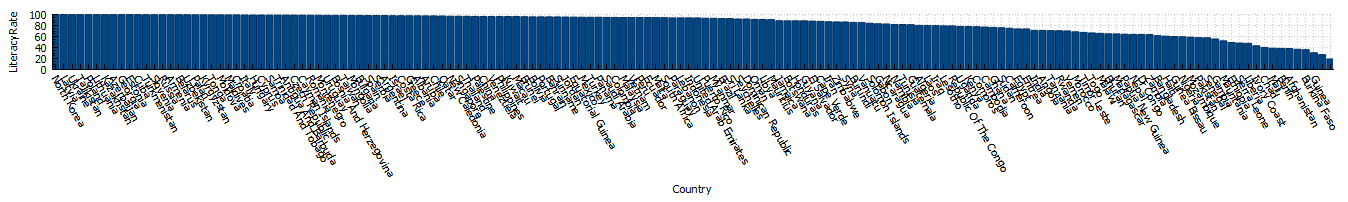

###  6. DATA MERGING 


### **Merging both the data sets with required variables - COVID_19, Literacy using JOIN**


In [14]:
%%sql data <<

SELECT covid.*,lt.LiteracyRate, lt.Population2020 
FROM COVID_19 as covid 
INNER JOIN Literacy as lt
ON covid.Country=lt.Country

 * sqlite:///../datasets/DATASET.db3
Done.
Returning data to local variable data


In [15]:
q= "SELECT covid.Country, covid.TotalCases, covid.newCases, covid.TotalDeaths, covid.newDeaths, covid.region, covid.reportDate,lt.LiteracyRate, lt.Population2020 FROM COVID_19 as covid INNER JOIN Literacy as lt ON covid.Country=lt.Country"

In [16]:
%%sql sqlite:///../datasets/DATASET.db3
DROP TABLE IF EXISTS 'COV_LP';
CREATE TABLE COV_LP(
    Country VARCHAR(50) NOT NULL,
   TotalCases INTEGER  NOT NULL ,
   newCases REAL  NOT NULL ,
   TotalDeaths INTEGER  NOT NULL ,
   newDeaths INTEGER  NOT NULL ,
   region VARCHAR(50) NOT NULL,
   reportDate NUMERIC NOT NULL ,
   LiteracyRate REAL(50) NOT NULL ,
   Population2020 REAL  NOT NULL,
    PRIMARY KEY(Country)  
);

Done.
Done.


[]

In [17]:
connection = sqlite3.connect('../datasets/DATASET.db3')
dfs = pd.read_sql(q,connection)
dfs.to_sql('COV_LP', connection, if_exists='append',index = False)  

#### This is the database of covid data of countries who affected and their new case with their  literecy rate and population

### Now the database ***DATASET.db3*** have three tables
   1. **COVID_19** - recent data for the countries
   
   2. **Literacy** - second data extracted from websracpping with literay rate and population for the Country
   
   3. **COV_LP** - the merged data of update COVID-19  cases with literacy and population for the Countries 
   
   
   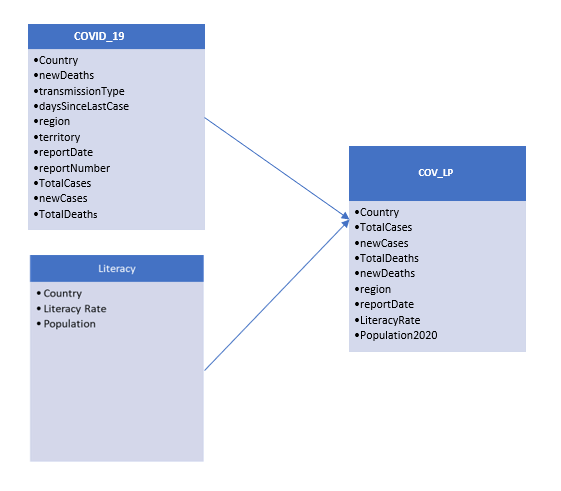


Find the information about  the table  **COV_LP** using the following command

In [18]:
%sql select * from COV_LP  LIMIT 10

 * sqlite:///../datasets/DATASET.db3
Done.


Country,TotalCases,newCases,TotalDeaths,newDeaths,region,reportDate,LiteracyRate,Population2020
Nigeria,16085,904.0,420,21,African Region,2020-06-15 00:00:00+00:00,59.6,206139589.0
South Africa,70038,4302.0,1480,57,African Region,2020-06-15 00:00:00+00:00,94.3,59308690.0
Ghana,11422,304.0,51,3,African Region,2020-06-15 00:00:00+00:00,76.6,31072940.0
Algeria,10919,109.0,767,7,African Region,2020-06-15 00:00:00+00:00,80.2,43851044.0
Cameroon,9572,829.0,275,5,African Region,2020-06-15 00:00:00+00:00,75.0,26545863.0
Guinea,4534,50.0,25,0,African Region,2020-06-15 00:00:00+00:00,30.4,13132795.0
Senegal,5090,94.0,60,0,African Region,2020-06-15 00:00:00+00:00,57.7,16743927.0
Gabon,3463,0.0,23,0,African Region,2020-06-15 00:00:00+00:00,83.2,2225734.0
Central African Republic,2222,165.0,7,0,African Region,2020-06-15 00:00:00+00:00,36.8,4829767.0
Kenya,3594,137.0,103,3,African Region,2020-06-15 00:00:00+00:00,78.0,53771296.0


In [19]:
%sql  PRAGMA table_info(COV_LP)

 * sqlite:///../datasets/DATASET.db3
Done.


cid,name,type,notnull,dflt_value,pk
0,Country,VARCHAR(50),1,None,1
1,TotalCases,INTEGER,1,None,0
2,newCases,REAL,1,None,0
3,TotalDeaths,INTEGER,1,None,0
4,newDeaths,INTEGER,1,None,0
5,region,VARCHAR(50),1,None,0
6,reportDate,NUMERIC,1,None,0
7,LiteracyRate,REAL(50),1,None,0
8,Population2020,REAL,1,None,0


#### The below command shows the new cases of Covid-19 for the Country New Zealand

In [20]:
%%sql 
SELECT  newCases,reportDate
FROM COVID_19
WHERE Country= 'New Zealand' and
   reportDate=(SELECT MAX(reportDate) FROM COVID_19);


 * sqlite:///../datasets/DATASET.db3
Done.


newCases,reportDate
0.0,2020-06-15 00:00:00+00:00


In [21]:
%%sql data << 
SELECT * 
FROM Cov_LP

 * sqlite:///../datasets/DATASET.db3
Done.
Returning data to local variable data


In [22]:
sql_df=data.DataFrame()
sql_df.head()

,Country,TotalCases,newCases,TotalDeaths,newDeaths,region,reportDate,LiteracyRate,Population2020
0,Nigeria,16085,904.0,420,21,African Region,2020-06-15 00:00:00+00:00,59.6,206139589.0
1,South Africa,70038,4302.0,1480,57,African Region,2020-06-15 00:00:00+00:00,94.3,59308690.0
2,Ghana,11422,304.0,51,3,African Region,2020-06-15 00:00:00+00:00,76.6,31072940.0
3,Algeria,10919,109.0,767,7,African Region,2020-06-15 00:00:00+00:00,80.2,43851044.0
4,Cameroon,9572,829.0,275,5,African Region,2020-06-15 00:00:00+00:00,75.0,26545863.0


In [23]:
pivot=sql_df.pivot_table(index='region', values='LiteracyRate',aggfunc='mean')
pivot

,LiteracyRate
region,
African Region,63.961538
Eastern Mediterranean Region,82.327778
European Region,98.741379
Region of the Americas,92.092000
SouthEast Asia Region,81.900000
Western Pacific Region,93.283333


#### This pivot table shows that literacy rate is low in African Region comared to others. However every region has 60% of literacy.

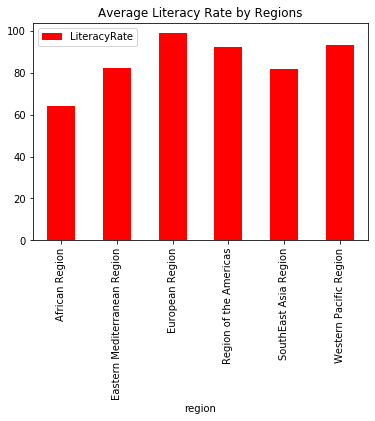

In [24]:
pivot.plot(kind='bar',title="Average Literacy Rate by Regions",facecolor="Red")

In [25]:
%%sql
SELECT Country,region, newCases,reportDate,LiteracyRate
FROM COV_LP
WHERE region= 'Region of the Americas' 

 * sqlite:///../datasets/DATASET.db3
Done.


Country,region,newCases,reportDate,LiteracyRate
Brazil,Region of the Americas,21704.0,2020-06-15 00:00:00+00:00,92.6
Chile,Region of the Americas,6938.0,2020-06-15 00:00:00+00:00,97.5
Panama,Region of the Americas,848.0,2020-06-15 00:00:00+00:00,95.0
Mexico,Region of the Americas,3494.0,2020-06-15 00:00:00+00:00,95.1
Peru,Region of the Americas,4383.0,2020-06-15 00:00:00+00:00,94.5
Colombia,Region of the Americas,1888.0,2020-06-15 00:00:00+00:00,94.7
Argentina,Region of the Americas,1531.0,2020-06-15 00:00:00+00:00,98.1
Dominican Republic,Region of the Americas,390.0,2020-06-15 00:00:00+00:00,91.8
Bolivia,Region of the Americas,913.0,2020-06-15 00:00:00+00:00,95.7
Honduras,Region of the Americas,323.0,2020-06-15 00:00:00+00:00,88.5


In [26]:
%%sql data << 
SELECT * 
FROM COV_LP

 * sqlite:///../datasets/DATASET.db3
Done.
Returning data to local variable data


In [27]:
sql_df=data.DataFrame()
sql_df.head()

,Country,TotalCases,newCases,TotalDeaths,newDeaths,region,reportDate,LiteracyRate,Population2020
0,Nigeria,16085,904.0,420,21,African Region,2020-06-15 00:00:00+00:00,59.6,206139589.0
1,South Africa,70038,4302.0,1480,57,African Region,2020-06-15 00:00:00+00:00,94.3,59308690.0
2,Ghana,11422,304.0,51,3,African Region,2020-06-15 00:00:00+00:00,76.6,31072940.0
3,Algeria,10919,109.0,767,7,African Region,2020-06-15 00:00:00+00:00,80.2,43851044.0
4,Cameroon,9572,829.0,275,5,African Region,2020-06-15 00:00:00+00:00,75.0,26545863.0


In [28]:
pivot=sql_df.pivot_table(index='region', values='newDeaths',aggfunc='sum')
pivot

,newDeaths
region,
African Region,111
Eastern Mediterranean Region,434
European Region,141
Region of the Americas,1891
SouthEast Asia Region,401
Western Pacific Region,15


The above pivot table shows that new death of each by yesterday.

**The below code wil give  all the database schema**

In [29]:
import os, sys, sqlite3
dbfile = "../datasets/DATASET.db3"
db = sqlite3.connect(dbfile)
cursor = db.cursor()
cursor.execute("select sql from sqlite_master where sql not NULL")
# cursor.fetchall()
database=[]
for row in cursor.fetchall():
        database.append(json.loads(json.dumps(row)))
db.close()
print('database....', database)

database.... [['CREATE TABLE COVID_19(\n       Country VARCHAR(50) NOT NULL,\n       TotalCases REAL NOT NULL  ,\n       newCases REAL    ,\n       TotalDeaths REAL NOT NULL  ,\n       newDeaths REAL   ,\n       transmissionType REAL ,\n       daysSinceLastCase REAL  ,\n       region VARCHAR(50) NOT NULL,\n       territory BLOB  NOT NULL ,\n       reportDate NUMERIC NOT NULL ,\n       reportNumber INTEGER  NOT NULL\n    )'], ['CREATE TABLE Literacy(\n       LiteracyRate REAL ,\n       Population2020 INTEGER,\n       Country VARCHAR(50) NOT NULL\n    )'], ['CREATE TABLE COV_LP(\n    Country VARCHAR(50) NOT NULL,\n   TotalCases INTEGER  NOT NULL ,\n   newCases REAL  NOT NULL ,\n   TotalDeaths INTEGER  NOT NULL ,\n   newDeaths INTEGER  NOT NULL ,\n   region VARCHAR(50) NOT NULL,\n   reportDate NUMERIC NOT NULL ,\n   LiteracyRate REAL(50) NOT NULL ,\n   Population2020 REAL  NOT NULL,\n    PRIMARY KEY(Country)  \n)']]
